## 数据挖掘、机器学习算法实习生需求分析  

  
  接上篇文章的“实习僧网站”数据爬取，这篇文章主要对“实习僧网站”招聘数据挖掘、机器学习的实习岗位信息进行分析。数据主要来自“数据挖掘”、“机器学习”和“算法”这3个关键词下的数据。爬下来的原始数据还比较脏，本文使用pandas进行数据处理和分析，结合seaborn和pyecharts包进行数据可视化。Python运行版本为3.6.3。

### 分析目标
1. 由于小E想要找的实习公司是机器学习算法相关的工作，所以只对“数据挖掘”、“机器学习”、“算法”这三个关键字进行了爬取；
2. 因此，分析目标就是国内公司对机器学习算法实习生的需求状况（仅基于实习僧网站），以及公司相关的分析。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
plt.style.use('ggplot')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点

### 1. 数据导入
- 把通过“数据挖掘”、“机器学习”和“算法”这3个关键词爬取到的3个csv文件数据导入为pandas DataFrame，再把他们concat起来
- 把ignore_index设置成True让其可以重新索引

In [2]:
data_dm = pd.read_csv("datamining.csv")
data_ml = pd.read_csv("machinelearning.csv")
data_al = pd.read_csv("mlalgorithm.csv")
data = pd.concat([data_dm, data_ml, data_al], ignore_index = True)

### 2. 数据基本信息和基本处理
- 随机抽取3个数据样本看数据是否导入正确
- 查看数据基本信息，看数据的行列数、数据类型是否正确、是否有重复数据，以及首先对重复数据进行处理

In [3]:
data.sample(3)

,auth_capital,city,com_class,com_fullname,com_id,com_intro,com_links,com_location,com_logo,com_name,...,job_deadline,job_detail,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
29,注册资本：1594.3879万人民币,上海,公司类型：有限责任公司,华院数据技术（上海）有限公司,组织机构代码：73814805-2,中国最早从事大数据分析挖掘的企业，致力于打造大数据产业生态圈,https://www.shixiseng.com/com/com_qebqujwjzwqb,上海,https://sxsimg.xiaoyuanzhao.com/A6/2F/A6E5AC0C...,华院数据,...,2018-04-03,"['工作职责：', '1. 研究、设计和验证基于大数据的数据挖掘解决方案', '2. 结合实...",https://www.shixiseng.com/intern/inn_wee2wpagrgzl,计算机研究员,2000人以上,18小时前,数据挖掘,6个月,2018-03-20 16:50:46,150-200/天
506,注册资本：500万元人民币,深圳,公司类型：有限责任公司（自然人独资）,深圳中科龙智数字技术有限公司,注册号：440301106872394,以智能产品与技术解决方案为核心业务的高新技术企业,https://www.shixiseng.com/com/com_juogmswikjc1,深圳市南山区硅谷大学城创业园A座1410,https://sxsimg.xiaoyuanzhao.com/95/85/95B6CF24...,中科龙智,...,2018-12-31,['2.负责算法的研发，改进，优化，和移植，保证算法的快速性和稳定性；'],https://www.shixiseng.com/intern/inn_1yar0kkul8pi,虚拟现实VR算法工程师（实习）,15-50人,28小时前,软件,13个月,2018-03-21 11:19:48,100-200/天
240,NaN,广州,,广州日报数据和数字化研究院,NaN,GDI以数据挖掘、分析以及数字新闻传播和新型智库构建为主要业务,https://www.shixiseng.com/com/com_tmzfw7kqfece,广州大学城,https://sxsimg.xiaoyuanzhao.com/0C/52/0C69C292...,数据研究院,...,2018-03-30,"['6、有较强抗压能力，适应高强度工作。', '4、对数据进行统计分析、图表制作及撰写分析报...",https://www.shixiseng.com/intern/inn_2l0vrgwz4col,数据分析师,15-50人,2月前,数据挖掘,3个月,2017-12-28 15:28:09,50-70/天


随机抽取一个数据，看看这个数据样本所有特征的数据类型

In [4]:
data.loc[666]

auth_capital                                      注册资本：130.2083万人民币
city                                                             上海
com_class                                 公司类型：股份有限公司(台港澳与境内合资、未上市)
com_fullname                                         纵目科技（上海）股份有限公司
com_id                                            组织机构代码：06087276-7
com_intro                               成为立足中国面向世界的从辅助驾驶到自动驾驶的技术引领者
com_links            https://www.shixiseng.com/com/com_k0gejst3xf8x
com_location                                北京市昌平区回龙观东大街腾讯总创空间B座535
com_logo          https://sxsimg.xiaoyuanzhao.com/7B/C2/7B75BE25...
com_name                                                       纵目科技
com_website                               http://www.zongmutech.com
com_welfare       ['发展潜力大', '活跃的工作环境', '团队体验', '棒棒的', '开放创新', '追...
day_per_week                                                   4天/周
detailed_intro    \n纵目科技成立于2013年1月，总部位于上海浦东张江高科技园区，在北京及深圳分别设有研发分...
est_date                                        

获取数据的基本信息，发现：
1. 一共有978条记录，27列
2. 某些列比如说“com_id”、“detailed_intro”、“est_date”等，具有些许缺失值
3. 所有数据都被导入成了object类型

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 27 columns):
auth_capital      906 non-null object
city              974 non-null object
com_class         954 non-null object
com_fullname      974 non-null object
com_id            906 non-null object
com_intro         974 non-null object
com_links         978 non-null object
com_location      978 non-null object
com_logo          974 non-null object
com_name          974 non-null object
com_website       865 non-null object
com_welfare       978 non-null object
day_per_week      978 non-null object
detailed_intro    912 non-null object
est_date          906 non-null object
industry          960 non-null object
job_academic      978 non-null object
job_deadline      978 non-null object
job_detail        681 non-null object
job_links         978 non-null object
job_title         978 non-null object
num_employee      972 non-null object
released_time     978 non-null object
tag               978

- 由于数据是通过3个关键词搜索爬取的，难免会有一个职位对应多个关键词的情况，所以难免会有重复数据  
- 这些重复数据对于我们的分析没有帮助，先drop掉，再看剩余数据情况
- 由于“job_links”字段（工作详情链接）对数据可以起唯一标识作用，所以可以基于该字段去重
- 发现数据剩余878行（说明刚好有100条重复数据）

In [6]:
data.drop_duplicates(subset='job_links', inplace=True)
data.shape

(878, 27)

### 3. 数据处理
由上可见：
- com_fullname、com_name、job_academic、job_links、tag不需要处理
- “auth_capital”（注册资本）、“day_per_week”（每周工作天数）、“num_employee”（公司规模）、“time_span”（实习月数）、“wage”（每天工资）等字段，都可以处理成数值型数据
- “est_date”（公司成立日期）、“job_deadline”（截止时间）、“released_time”（发布时间）、“update_time”（更新时间）等字段，可以处理成datetime类型数据
- “city”（城市）、“com_class”（公司类型）、“com_intro（公司简介）”、“job_title”（职位名称）等字段可以进一步处理
- 类似于“com_logo”（公司logo）、“industry”（行业）等字段，可以视情况处理
- com_id、com_links、com_location、com_website、com_welfare、detailed_intro、job_detail在本次分析中用不上，不处理

#### 3.1 新建data_clean数据框
- 新建data_clean数据框，数据处理在data_clean上进行
- data_clean用以保存处理好的数据，原数据data用以保存原始数据记录
- 把本次分析中用不上的字段先drop掉

In [7]:
data_clean = data.drop(['com_id', 'com_links', 'com_location', 'com_website', 
                 'com_welfare', 'detailed_intro', 'job_detail'], axis = 1)

#### 3.2 数值型数据处理
包括“auth_capital”（注册资本）、“day_per_week”（每周工作天数）、“num_employee”（公司规模）、“time_span”（实习月数）、“wage”（每天工资）等字段  

##### 3.2.1 “auth_capital”（注册资本）
- 随机抽取“auth_capital”，发现该字段的格式基本为：“注册资本：（数字）万|万元（币种）”，有少许的格式为：“注册资本：（币种）（数字）万|万元”， 或者“注册资本：无”，或者该字段为缺失值
- 币种有人民币、美元、欧元、港元（港币）等
- 这里的处理思路是先把“注册资本：”清理掉，再把数值型数据提取出来，然后根据各币种的汇率，把注册资本转换为“万元人民币”单位

In [8]:
data.auth_capital.sample(20)

621           注册资本：(美元)200万元
475            注册资本：4000万人民币
433            注册资本：1200万香港元
39                注册资本：250万元
502    注册资本：6166.7208 万元 人民币
744      注册资本：304.757300万人民币
612             注册资本：5000 万元
236          注册资本：4520 万元 美元
557           注册资本：1161万元人民币
739             注册资本：3000 万元
628            注册资本：9449万元美元
188          注册资本：(美元)1000万元
83             注册资本：4000万人民币
958             注册资本：300万人民币
125            注册资本：5000万人民币
817           注册资本：1500万元人民币
474             注册资本：100万人民币
820        注册资本：2023.06万元人民币
920       注册资本：319.7247万元人民币
205                      NaN
Name: auth_capital, dtype: object

- 先以“：”分割字符串，便可把“注册资本：”清理掉，保留数值和币种

In [9]:
auth_capital = data['auth_capital'].str.split('：', expand = True)
auth_capital.sample(5)

,0,1
959,注册资本,1000万元
479,注册资本,15000万元美元
921,注册资本,100万美元
151,注册资本,217128万元人民币
307,注册资本,1万元人民币


- 接着把数字提取出来， 转换为float型

In [10]:
auth_capital['num'] = auth_capital[1].str.extract('([0-9.]+)', expand=False).astype('float')
auth_capital.sample(5)

,0,1,num
108,注册资本,100万人民币,100.0000
703,注册资本,4000万元人民币,4000.0000
359,注册资本,36409.6355 万元 人民币,36409.6355
464,注册资本,22.3464万元人民币,22.3464
587,注册资本,5400万人民币,5400.0000


- 币种的描述比较乱，比如同是人民币，描述有“万人民币”、“万元人民币”、“万人民币元”、“万元 人民币”等
- 先看看币种的描述都有哪些（以“万”字分割字符串，便可把数值和币种分开来）

In [11]:
auth_capital[1].str.split('万', expand = True)[1].unique()

array(['美元', '人民币', '元美元', None, '元人民币', '人民币元', '元', '元 人民币', '', '元 美元',
       '元港元（港币）', '港币', '香港元', '欧元', '元 港元（港币）'], dtype=object)

- 币种的描述有多种， 我们可以根据不同币种，在数值上乘以相应的汇率，转换为“万元人民币”单位
- 为了过程更好理解，可以先新建一个“ex_rate”（汇率）列，保存对应的汇率，由于数据量不大，这里用pd.Series.apply(function)（当然也可以使用pd.DataFrame.apply(function)一步到位）
- 港币、美元、欧元兑人民币的汇率分别为 0.80、6.29、7.73

In [12]:
def get_ex_rate(string):
    if string == None:
        return np.nan
    if '人民币' in string:
        return 1.00
    elif '港' in string:
        return 0.80
    elif '美元' in string:
        return 6.29
    elif '欧元' in string:
        return 7.73
    elif '万' in string:
        return 1.00
    else:
        return np.nan
    
auth_capital['ex_rate'] = auth_capital[1].apply(get_ex_rate)
auth_capital.sample(5)

,0,1,num,ex_rate
316,注册资本,3000万元人民币,3000.0,1.00
475,注册资本,4000万人民币,4000.0,1.00
396,注册资本,1000万美元,1000.0,6.29
771,注册资本,4000 万元 美元,4000.0,6.29
694,注册资本,203000 万元,203000.0,1.00


- 由'num'和'ex_rate'相乘便是转换为“万元人民币”的注册资本字段
- 把干净的数据保存进data_clean中，方便之后分析

In [13]:
data_clean['auth_capital'] = auth_capital['num'] * auth_capital['ex_rate']
data_clean['auth_capital'].head()

0    235875.0000
1     27570.9972
2       314.5000
3     28430.8000
4     28430.8000
Name: auth_capital, dtype: float64

##### 3.2.2 “day_per_week”（每周工作天数）
由下可见：
- “day_per_week”字段没有缺失值，并且取值在“2-6天/周”之间
- 可以采用直接赋值的方法处理该字段

In [14]:
data.day_per_week.unique()

array(['4天/周', '5天/周', '3天/周', '2天/周', '6天/周'], dtype=object)

In [15]:
data_clean.loc[data['day_per_week'] == '2天/周', 'day_per_week'] = 2
data_clean.loc[data['day_per_week'] == '3天/周', 'day_per_week'] = 3
data_clean.loc[data['day_per_week'] == '4天/周', 'day_per_week'] = 4
data_clean.loc[data['day_per_week'] == '5天/周', 'day_per_week'] = 5
data_clean.loc[data['day_per_week'] == '6天/周', 'day_per_week'] = 6

##### 3.2.3 “num_employee”（公司规模）
- 同样，由于“num_employee”字段取值在['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人', '少于15人', '5000人以上']，可以采用跟“day_per_week”字段一样的处理方法
- '少于15人'、'15-50人'、'50-150人'都记为'小型企业','150-500人'、'500-2000人'记为'中型企业'，'2000人以上'、'5000人以上'记为大型企业

In [16]:
data.num_employee.unique()

array(['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人',
       '少于15人', '5000人以上'], dtype=object)

In [17]:
data_clean.loc[data['num_employee'] == '少于15人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '15-50人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '50-150人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '150-500人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '500-2000人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '2000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'] == '5000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'].isna(), 'num_employee'] = np.nan

##### 3.2.4 “time_span”（实习月数）
由下可知：
- “time_span”字段没有缺失值，由“1-18个月”组成
- 当然，你也可以通过跟上面一样的处理方式来处理，但是，这种方式对于取值多的字段来说，第一比较繁琐，第二，其实这个赋值方式本身的运行速度很慢
- 可以考虑构造一个字典，通过pd.Series.map() 也就是映射的方式来做，方便快捷

In [18]:
data.time_span.unique()

array(['3个月', '4个月', '6个月', '7个月', '5个月', '9个月', '8个月', '10个月', '12个月',
       '13个月', '18个月', '14个月', '16个月', '11个月', '15个月', '2个月', '17个月', '1个月'], dtype=object)

In [19]:
mapping = {}
for i in range(1,19):
    mapping[str(i) + '个月'] = i
print(mapping)

{'1个月': 1, '2个月': 2, '3个月': 3, '4个月': 4, '5个月': 5, '6个月': 6, '7个月': 7, '8个月': 8, '9个月': 9, '10个月': 10, '11个月': 11, '12个月': 12, '13个月': 13, '14个月': 14, '15个月': 15, '16个月': 16, '17个月': 17, '18个月': 18}


In [20]:
data_clean['time_span'] = data['time_span'].map(mapping)
data_clean.head(3)

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,day_per_week,est_date,industry,job_academic,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
0,235875.0000,北京,公司类型：有限责任公司(台港澳法人独资),淘宝（中国）软件有限公司,淘宝网是亚太地区较大的网络零售、商圈,https://sxsimg.xiaoyuanzhao.com/FB/BC/FBDB6AC6...,淘宝,4,成立日期：2004-12-07,计算机/互联网,硕士,2018-04-13,https://www.shixiseng.com/intern/inn_g2vpcs8lukcr,【淘宝】算法工程师/算法专家,大型企业,7分钟前,数据挖掘,3,2018-03-21 10:48:06,200-201/天
1,27570.9972,上海,公司类型：股份有限公司(上市),游族网络股份有限公司,全球领先的互动娱乐供应商,https://sxsimg.xiaoyuanzhao.com/BD/6D/BD305709...,游族网络,5,成立日期：1995-09-22,计算机/互联网,本科,2020-12-31,https://www.shixiseng.com/intern/inn_46watgzrvqsg,大数据挖掘工程师 （2018校园）,中型企业,18分钟前,软件,4,2018-03-21 10:37:22,160-280/天
2,314.5000,广州,公司类型：有限责任公司(台港澳法人独资),广州网易互动娱乐有限公司,国内中国领先的互联网技术公司，游戏行业领导者。,https://sxsimg.xiaoyuanzhao.com/company_logo/2...,网易游戏,4,成立日期：2002-10-15,互联网,本科,2018-03-31,https://www.shixiseng.com/intern/inn_wnfrd8o7wly2,数据挖掘研究实习生（AI方向）,大型企业,32分钟前,数据挖掘,4,2018-03-21 10:23:45,130-150/天


##### 3.2.5 “wage”（每天工资）
- 通过观察可知，该字段没有缺失值，并且格式全都为：xxx-xxx/天
- 可以取一个最低工资，一个最高工资，再求一个平均工资
- 这里，可以用之前的pd.Series.apply(function)来做，即定义一个函数提取每条记录中的工资最小和最大值
- 不过，更加简便的方法肯定是正则提取啊

In [21]:
data['wage'].sample(5)

838    500-800/天
444    200-250/天
645    200-400/天
622    100-200/天
886    230-350/天
Name: wage, dtype: object

这一步我估计需要解释一下：
- 首先使用正则'([0-9.]+)-([0-9.]+)/天'提取出两列数字（也就是最低和最高工资），设置expand=True返回一个数据框
- 由于返回回来的是字符串格式，需要把它们转换为整型（int），所以使用astype('int')
- 最后，对每行记录求平均，返回一个Series赋值给data_clean['average_wage']

In [22]:
data_clean['average_wage'] = data['wage'].str.extract('([0-9.]+)-([0-9.]+)/天', expand=True).astype('int').mean(axis = 1)
data_clean['average_wage'].head()

0    200.5
1    220.0
2    140.0
3    175.0
4    175.0
Name: average_wage, dtype: float64

#### 3.3 时间数据处理
包括“est_date”（公司成立日期）、“job_deadline”（截止时间）、“released_time”（发布时间）、“update_time”（更新时间）等字段  

##### 3.3.1 “est_date”（公司成立日期）
- 随机抽取发现“est_date”这个字段的格式为：成立日期：xxxx-xx-xx
- 因此，直接正则提取，然后把它转换为datetime格式就可以了

In [23]:
data['est_date'].sample(5)

92     成立日期：2007-08-17
559    成立日期：2015-08-17
765    成立日期：2012-07-10
267    成立日期：2016-02-22
957    成立日期：2015-05-28
Name: est_date, dtype: object

In [24]:
data_clean['est_date'] = pd.to_datetime(data['est_date'].str.extract('成立日期：([0-9-]+)', expand=False))
data_clean['est_date'].sample(5)

491   2017-09-26
534   2016-07-25
710   2016-06-02
378   2016-11-01
563   2017-03-16
Name: est_date, dtype: datetime64[ns]

##### 3.3.2 “job_deadline”（截止时间）
- 这个字段很干净，直接类型转换便可

In [25]:
data['job_deadline'].sample(5)

864    2018-04-05
241    2018-05-31
304    2018-12-31
188    2018-04-30
425    2018-03-31
Name: job_deadline, dtype: object

In [26]:
data_clean['job_deadline'] = pd.to_datetime(data['job_deadline'])

##### 3.3.3 “released_time”（发布时间）
- 观察数据发现，该字段1小时内的都以分钟表示、1小时-2天内的都以小时表示、2天-1周内的都以天表示，1周-1个月内的都以周表示，1个月以上的以月表示
- 可以考虑清洗成：2天以内是最新的（newest），2天-1周是新的（new），1周-1个月是可以投简历的（acceptable），1个月以上的是旧的（old）
- 这个的处理方法很多，我的方法是先把每条记录中的分钟、小时、天、周、月提取出来，再定义一个映射map一下就可以了

In [27]:
data['released_time'].sample(5)

764      1周前
55     21小时前
595      2天前
439    23小时前
745      7天前
Name: released_time, dtype: object

In [28]:
data_clean['released_time'] = data['released_time'].str.extract('[0-9-]+(\w+)前', expand=False).map(
    {'分钟':'newest', '小时':'newest', '天':'new', '周':'acceptable', '月':'old'})
data_clean['released_time'].sample(5)

305       new
83     newest
301       new
443    newest
351    newest
Name: released_time, dtype: object

##### 3.3.4 “update_time”（更新时间）
- 更新时间字段格式很工整，直接转换类型便可

In [29]:
data['update_time'].sample(5)

587    2018-03-20 14:28:14
122    2018-03-18 10:56:26
775    2018-03-14 09:24:40
268    2018-03-20 12:53:21
852    2018-03-08 13:30:08
Name: update_time, dtype: object

In [30]:
data_clean['update_time'] = pd.to_datetime(data['update_time'])

#### 3.4 字符型数据处理
包括“city”（城市）、“com_class”（公司类型）、“com_intro（公司简介）”、“job_title”（职位名称）等字段

##### 3.4.1 “city”（城市）处理
- 乍一看这个字段还挺整洁的，取唯一值看一下发现有些城市还是需要稍微处理一下
- 比如说成都有“成都市”和“成都”，珠海有“珠海市”和“珠海”等
- 直接赋值处理

In [31]:
data['city'].unique()

array(['北京', '上海', '广州', nan, '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海市', '其他', '重庆', '武汉', '无锡', '天津', '珠海 深圳', '长沙', '厦门', '珠海',
       '济南', '香港', '苏州', '上海漕河泾开发区', '晋江', '东莞', '成都市', '大连', '福州', '沈阳'], dtype=object)

In [32]:
data_clean.loc[data_clean['city'] == '成都市', 'city'] = '成都'
data_clean.loc[data_clean['city'].isin(['珠海市', '珠海 深圳', '珠海']), 'city'] = '珠海'
data_clean.loc[data_clean['city'] == '上海漕河泾开发区', 'city'] = '上海'

- 忍不住好奇心，先看一下招聘“机器学习算法”实习生前10的城市
- 发现北京遥遥领先、接着是上海、杭州、深圳、广州

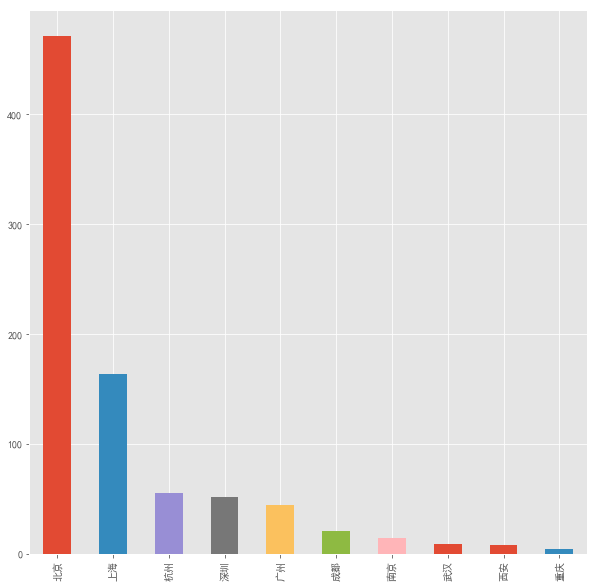

In [33]:
data_clean['city'].value_counts().nlargest(10).plot(kind = 'bar')

#### 3.4.2 “com_class”（公司和企业类型）处理
- 类型有很多，可以按照组织形式可以分为独资企业、合伙企业、公司制企业，公司制企业又分为有限责任公司和股份有限公司等等
- 这里主要把它分为‘股份有限公司（未上市）’、‘股份有限公司（上市）’、‘有限责任公司’、‘外商投资公司’、‘有限合伙企业’、‘国有企业’这6种
- 处理方法跟上面币种的处理方法一致

- 首先看看都有哪些公司（或企业）类型

In [34]:
list(data['com_class'].unique())

['公司类型：有限责任公司(台港澳法人独资)',
 '公司类型：股份有限公司(上市)',
 '公司类型：有限责任公司(外国法人独资)',
 nan,
 '公司类型：有限责任公司',
 '公司类型：有限责任公司（法人独资）',
 '公司类型：其他有限责任公司',
 ' ',
 '公司类型：其他股份有限公司(非上市)',
 '公司类型：有限责任公司(中外合资)',
 '公司类型：有限责任公司(自然人投资或控股)',
 '公司类型：有限责任公司(自然人独资)',
 '公司类型：有限责任公司（自然人投资或控股）',
 '公司类型：有限责任公司(法人独资)',
 '公司类型：有限责任公司分公司（自然人独资）',
 '公司类型：股份有限公司(中外合资、上市)',
 '公司类型：有限责任公司（台港澳法人独资）',
 '公司类型：有限责任公司\n',
 '公司类型：有限责任公司（自然人独资）',
 '公司类型：有限责任公司（自然人投资或控股的法人独资）',
 '公司类型：股份有限公司(非上市、自然人投资或控股)',
 '公司类型：有限责任公司(台港澳与境内合资)',
 '公司类型：无',
 '公司类型：股份有限公司分公司(上市、国有控股)',
 '公司类型：私营有限责任公司(自然人控股或私营性质企业控股)',
 '公司类型：全民所有制',
 '公司类型：有限责任公司（外国法人独资）',
 '公司类型：股份有限公司(非上市)',
 '公司类型：股份有限公司(上市、自然人投资或控股)',
 '公司类型：股份有限公司(台港澳与境内合资、上市)',
 '公司类型：其他股份有限公司(上市)',
 '公司类型：有限责任公司分公司（非自然人投资或控股的法人独资）',
 '公司类型：其他股份有限公司（上市）',
 '公司类型：有限责任公司（非自然人投资或控股的法人独资）',
 '公司类型：股份有限公司',
 '公司类型：非上市股份有限公司',
 '公司类型：分公司',
 '公司类型：股份有限公司（上市、自然人投资或控股）',
 '公司类型：有限合伙',
 '公司类型：外商投资公司分公司',
 '公司类型：有限责任公司(台港澳与外国投资者合资)',
 '公司类型：股份有限公司（非上市）',
 '公司类型：有限责任公司(外商投资企业法人独资)',
 '公司类型：上市股份有限公司',
 '公司类型：股份

- 定义一个函数处理这些类型，利用pd.Series.apply(function)方法
- 把处理好的数据保存到data_clean中

In [35]:
def get_com_type(string):
    if string == None:
        return np.nan
    elif ('非上市' in string) or ('未上市' in string):
        return '股份有限公司（未上市）'
    elif '股份' in string:
        return '股份有限公司（上市）'
    elif '责任' in string:
        return '有限责任公司'
    elif '外商投资' in string:
        return '外商投资公司'
    elif '有限合伙' in string:
        return '有限合伙企业'
    elif '全民所有' in string:
        return '国有企业'
    else:
        return np.nan

In [36]:
com_class = data['com_class'].str.split('：', expand = True)
com_class['com_class'] = com_class[1].apply(get_com_type)
com_class.sample(5)

,0,1,com_class
658,公司类型,有限责任公司(自然人投资或控股),有限责任公司
115,公司类型,有限责任公司(外国法人独资),有限责任公司
458,公司类型,有限责任公司（自然人投资或控股）,有限责任公司
962,公司类型,有限责任公司(自然人投资或控股),有限责任公司
325,公司类型,有限责任公司(法人独资),有限责任公司


In [37]:
data_clean['com_class'] = com_class['com_class']

- “com_intro”（公司简介）、“job_title”（职位名称）两个字段暂时不处理

#### 3.5 “com_logo”（公司logo）、“industry”（行业）也暂时不处理
- 更改一下每列的顺序
- 再把data_clean保存到本地

In [38]:
data_clean = data_clean.reindex(columns=['com_fullname', 'com_name', 'job_academic', 'job_links', 
                                         'tag','auth_capital', 'day_per_week', 'num_employee', 'time_span',
                                         'average_wage', 'est_date', 'job_deadline', 'released_time',
                                         'update_time', 'city', 'com_class', 'com_intro', 'job_title',
                                         'com_logo', 'industry'])
data_clean.to_csv('/Users/apple/Desktop/shixiseng/data_clean.csv', index = False)

### 4. 数据分析
终于可以进入数据分析的阶段。可以利用以上的城市、薪资、学历、行业、公司等相关字段，分析出目前国内公司对机器学习算法实习生的需求状况（仅基于实习僧网站），以及公司的相关情况

- 首先，看看清洗完的数据的基本情况

#### 4.1 数据基本情况

In [39]:
data_clean.sample(3)

,com_fullname,com_name,job_academic,job_links,tag,auth_capital,day_per_week,num_employee,time_span,average_wage,est_date,job_deadline,released_time,update_time,city,com_class,com_intro,job_title,com_logo,industry
656,深圳码隆科技有限公司,码隆科技,本科,https://www.shixiseng.com/intern/inn_thlsquqyifps,软件,153.0858,5,中型企业,4,300.0,2014-07-16,2018-06-30,new,2018-03-19 14:03:34,深圳,有限责任公司,一家专注于深度学习与计算机视觉技术创新的人工智能公司,深度学习算法实习生,https://sxsimg.xiaoyuanzhao.com/F5/33/F5E7B0CF...,计算机/互联网
394,北京融联世纪信息技术有限公司,融360,本科,https://www.shixiseng.com/intern/inn_fpm2hqfvovgb,算法,62900.0000,4,中型企业,3,335.0,2012-06-25,2018-04-17,newest,2018-03-22 10:16:40,北京,有限责任公司,互联网金融垂直搜索平台,数据算法助理,https://sxsimg.xiaoyuanzhao.com/CC/12/CCDFD256...,"互联网,金融/保险"
958,上海珞鹏航空科技有限公司,珞鹏航空,硕士,https://www.shixiseng.com/intern/inn_g0zppaybef1u,软件,300.0000,5,小型企业,8,150.0,2016-09-21,2018-06-30,old,2017-12-15 09:53:56,上海,有限责任公司,全球领先的涵道式无人机研发企业,无人机导航算法工程师,https://sxsimg.xiaoyuanzhao.com/76/3F/76726149...,航天/航空


In [40]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 20 columns):
com_fullname     874 non-null object
com_name         874 non-null object
job_academic     878 non-null object
job_links        878 non-null object
tag              878 non-null object
auth_capital     782 non-null float64
day_per_week     878 non-null int64
num_employee     872 non-null object
time_span        878 non-null int64
average_wage     878 non-null float64
est_date         788 non-null datetime64[ns]
job_deadline     878 non-null datetime64[ns]
released_time    878 non-null object
update_time      878 non-null datetime64[ns]
city             874 non-null object
com_class        794 non-null object
com_intro        874 non-null object
job_title        878 non-null object
com_logo         874 non-null object
industry         862 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(13)
memory usage: 144.0+ KB


很好，数据是想要的样子  
  
#### 4.2 城市与职位数量
- 其实由上面已经知道了，北上广深杭这五个城市毫无疑问地占据了前五的位置，其中北京遥遥领先，有471个职位，占53.89%；上海有164个，占18.76%；北上广深杭这五个城市占了所有的89.93%（将近九成），说明这个职位还是集中在一线城市
- 另外值得注意的是，杭州排到了第三，在广州和深圳的前面，说明杭州在这方面的发展还挺好的
- 原以为杭州的职位都被阿里系霸占了，结果抽取数据出来一看发现并没有，其中一家叫“非白三维”的公司占了10个职位，这到底是一家什么样的公司？可以去了解一下

In [41]:
city = data_clean['city'].value_counts()
city[:15]

北京    471
上海    164
杭州     55
深圳     52
广州     44
成都     21
南京     14
武汉      9
西安      8
重庆      4
苏州      4
沈阳      4
珠海      4
合肥      3
无锡      2
Name: city, dtype: int64

In [42]:
bar = pyecharts.Bar('城市与职位数量')
bar.add('', city[:15].index, city[:15].values, mark_point=["max"])
bar

In [43]:
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct[:15]

北京    53.89%
上海    18.76%
杭州     6.29%
深圳     5.95%
广州     5.03%
成都     2.40%
南京     1.60%
武汉     1.03%
西安     0.92%
重庆     0.46%
苏州     0.46%
沈阳     0.46%
珠海     0.46%
合肥     0.34%
无锡     0.23%
Name: city, dtype: object

In [44]:
(city/city.sum())[:5].sum()

0.89931350114416475

In [45]:
data_clean.loc[data_clean['city'] == '杭州', 'com_name'].value_counts()[:5]

非白三维    10
光珀       6
虹软       5
同花顺      4
菜鸟网络     3
Name: com_name, dtype: int64

- 再看看这15个个城市中，招聘职位数量前五的公司到底是哪些
- 通过定义一个函数topN来实现

In [46]:
def topN(dataframe, n=5):
    counts = dataframe.value_counts()
    return counts[:n]

In [47]:
data_clean.groupby('city').com_name.apply(topN).loc[list(city_pct[:15].index)]

city               
上海    华院数据             10
      爱奇艺               8
      驭势科技              7
      七牛云               4
      纵目科技              4
北京    百度               21
      滴滴出行             19
      今日头条             12
      京东金融             10
      作业帮               9
南京    金智信息              2
      南京地平线机器人技术        2
      小黑鱼科技             2
      矽岸信息              1
      途牛旅游网             1
合肥    乐职网               3
广州    网易游戏              5
      探迹                4
      汇量科技              2
      景驰科技              2
      精点数据              2
成都    天佑飞天              3
      知道创宇              2
      实验楼               1
      川机院               1
      博智信息              1
无锡    英臻科技              1
      乐骐科技              1
杭州    非白三维             10
      光珀                6
      虹软                5
      同花顺               4
      菜鸟网络              3
武汉    小弦科技              2
      武汉安天              1
      光庭信息              1
      明日数据              1
      乐行          

#### 4.3 薪资

##### 4.3.1 平均薪资
- 由于"average_wage"（薪资）一列的单位是每天，所以可以跟"day_per_week"（每周天数）结合起来算每月的工资（以一个月4周算）
- 另起一列“salary”（月工资）保存数据
- 发现平均实习工资是3645元人民币，应该还是OK的噶？

In [48]:
data_clean['salary'] = data_clean['average_wage'] * data_clean['day_per_week'] * 4
data_clean['salary'].mean()

3644.9407744874716

##### 4.3.2 薪资与城市
- 以城市分组，看不同城市平均实习工资怎么样，发现薪资前五名中，北上广深杭只有杭州进入了前五，不过前五中其它四个城市的样本量都太小，数据不具有代表性
- 看看职位需求前10的城市，平均实习薪资怎么样，发现杭州是最高的，突破了4000（还算可以的噶？），紧接着是北京3790(弱弱地问一句，够房租不？)，然后是深圳、上海、南京、广州

In [49]:
salary_by_city = data_clean.groupby('city')['salary'].mean()
salary_by_city.nlargest(10)

city
晋江    9000.000000
长沙    4500.000000
东莞    4150.000000
杭州    4139.345455
福州    4000.000000
北京    3789.927813
深圳    3783.538462
苏州    3775.000000
厦门    3750.000000
上海    3579.170732
Name: salary, dtype: float64

In [50]:
top10_city = salary_by_city[city_pct.index[:10]].sort_values(ascending=False)
top10_city

杭州    4139.345455
北京    3789.927813
深圳    3783.538462
上海    3579.170732
南京    3420.857143
广州    3176.363636
成都    2850.000000
西安    2317.500000
重庆    2222.500000
武汉    1912.222222
Name: salary, dtype: float64

In [51]:
bar = pyecharts.Bar('北上广深杭等城市平均实习工资')
bar.add('', top10_city.index, np.round(top10_city.values, 0), mark_point=["max"], is_convert=True)
bar

- 再看看这些城市实习薪资的分布怎么样

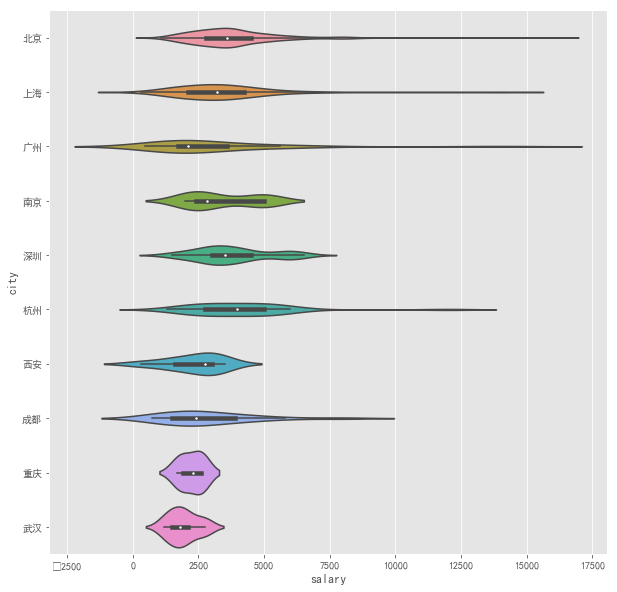

In [52]:
top10_city_box = data_clean.loc[data_clean['city'].isin(top10_city.index),:]
sns.violinplot(x ='salary', y ='city', data = top10_city_box)

#### 4.4 学历

##### 4.4.1 数据挖掘、机器学习算法的学历要求
- 先看看总体来说，需要什么学历的最多，发现需求的本科生数量是最多的，约占50%，紧接着是硕士，约占30%，博士是最少的

In [53]:
job_academic = data_clean['job_academic'].value_counts()
job_academic

本科    435
硕士    267
不限    160
大专     12
博士      4
Name: job_academic, dtype: int64

In [54]:
pie = pyecharts.Pie("学历要求")
pie.add('', job_academic.index, job_academic.values)
pie

##### 4.4.2 学历与薪资
- 再看看实习薪资和学历有什么关系。发现基本上是正相关的关系，博士最高，接着是硕士、本科、大专
- 但是，本科和硕士的实习工资差别不大
- 总体看起来实习工资都偏低一些（不知道大家的实习工资是多少呢？），就算是博士也不太高

In [55]:
data_clean.groupby(['job_academic'])['salary'].mean().sort_values()

job_academic
大专    2165.000000
不限    3570.525000
本科    3622.266667
硕士    3786.546816
博士    4075.000000
Name: salary, dtype: float64

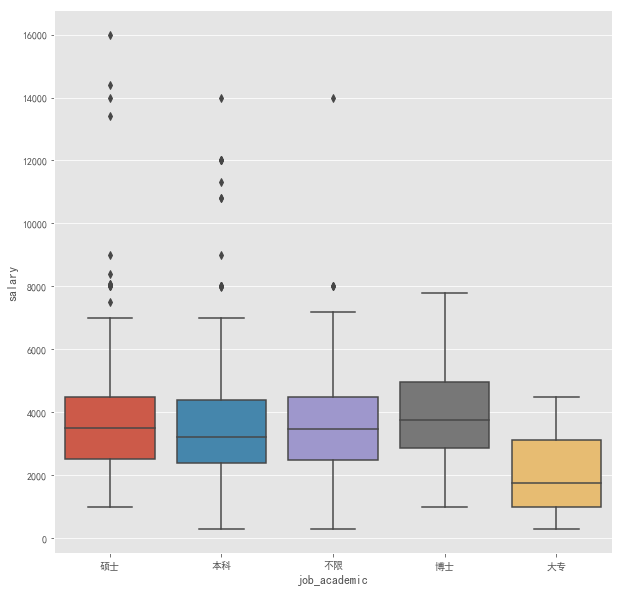

In [56]:
sns.boxplot(x="job_academic", y="salary", data=data_clean)

#### 4.4 行业
- 有一个好奇是，在现在的各行各业中，哪些行业对数据挖掘、机器学习算法的实习生需求更多，还有哪些行业现在也正在应用机器学习算法
- “industry”字段是前面还未处理的，先看看数据长什么样子，发现同一条记录可能对应着一个或者多个行业，格式为xxx/xxx或者xxx,xxx，或者xxx，xxx等
- 字段存在一定的缺失值
- 考虑把字段按照/,，分割，行业名称每出现一次，做一次记录，比如“计算机/互联网,金融”，既属于“计算机”行业、又属于“互联网”行业，也属于“金融行业”，因此这3个行业的记录加1

In [57]:
data_clean['industry'].sample(5)

443                 互联网
826    快消,生物/医疗,计算机/互联网
759             计算机/互联网
420             计算机/互联网
961             计算机/互联网
Name: industry, dtype: object

In [58]:
industry = data_clean.industry.str.split('/|,|，', expand = True)

这里需要解释一下：
- 首先把上面split好的industry应用pandas的顶级方法value_counts，计算出每列不同行业的记录数
- 然后把这几列的数据加起来，得到总数
- 再取top15

In [59]:
industry_top15 = industry.apply(pd.value_counts).sum(axis = 1).nlargest(15)

In [60]:
bar = pyecharts.Bar('行业与职位数量')
bar.add('', industry_top15.index, industry_top15.values, 
        mark_point=["max","min","average"], xaxis_rotate=45)
bar

由上可知：
- 互联网和计算机行业对于这方面的实习生需求是最多的（这是当然）
- 金融、通信、电子行业对于这方面的实习生需求在前五名，说明数据挖掘、机器学习算法在这些行业也得到了比较好的应用
- 另外，一些传统行业比如说机械、制造，也对这方面的实习生有些许需求，说明传统行业也开始关注和探索新的技术
- 医药行业和教育培训行业也对此有些许需求；其实医药行业对机器学习算法的探索已经很多了，教育培训呢，估计是机器学习最近几年的蓬勃发展也带动了教育培训的发展吧

#### 4.5 公司
有很多跟公司相关的字段，很好奇哪些公司现在招的实习生职位数量最多、公司规模如何、这些公司都是什么时候成立的、是不是最近几年新成立的公司占的比例比较大、哪些公司给的实习薪资高一些、哪些公司比较看重学历
  
##### 4.5.1 公司与职位数量、平均实习月薪
- 看看招聘职位数量前15名的公司都有哪些。发现了很多耳熟能详的大公司，比如说百度、滴滴、爱奇艺、头条、京东等
- 还有一些比较陌生的，比如中科龙智、华院数据、非白三维、恒润科技、驭势科技、Rokid A-Lab等，这些公司都值得去了解一下
- 这些公司中，今日头条的平均实习月薪最高，6400.5元，非白三维这家公司的实习月薪也不错，5150元，比某度好多了哈哈哈

In [61]:
data_clean.groupby('com_name').salary.agg(['count', 'mean']).sort_values(by='count', ascending = False)[:15]


,count,mean
com_name,,
百度,21,3256.190476
滴滴出行,19,3614.736842
中科龙智,13,3000.000000
爱奇艺,12,3983.166667
今日头条,12,6400.500000
京东金融,10,4845.000000
非白三维,10,5150.000000
华院数据,10,3290.000000
恒润科技,9,1858.666667


##### 4.5.2 公司规模与职位数量
- 数据挖掘、机器学习的实习生的需求，是否是以大型企业为主导呢？
- 发现并不是的，这方面的需求是以小中大型企业向下递减的，也间接说明了这个行业迅速发展的同时催生了很多中小企业吧

In [62]:
data_clean['num_employee'].value_counts()

小型企业    355
中型企业    283
大型企业    234
Name: num_employee, dtype: int64

##### 4.5.3 公司规模与实习月薪
- 我猜应该是大公司实习月薪高，小公司实习月薪低吧
- 发现：我还是太天真了，结果刚好相反，小公司给的高，大公司给的低
- 仔细想想好像也不无道理，大公司靠自己的名气吸引实习生，小公司没有名气，只能靠给更多的钱来吸引实习生了

In [63]:
data_clean.groupby('num_employee')['salary'].mean()

num_employee
中型企业    3633.823322
大型企业    3497.136752
小型企业    3748.304225
Name: salary, dtype: float64

##### 4.5.4 公司实习期长度
- 发现大多数公司要求的是实习3个月和6个月，基本上都是实习三个月起
- 平均实习期长度是五个半月

In [64]:
data_clean['time_span'].value_counts()

3     289
6     190
4     113
7      73
5      67
8      35
10     34
13     20
12     17
9      11
11      8
15      6
16      4
14      4
2       3
18      2
17      1
1       1
Name: time_span, dtype: int64

In [65]:
data_clean['time_span'].mean()

5.5193621867881548

##### 4.5.5 企业成立时间
刚好可以用企业成立时间验证一下猜想，也就是最近这个行业是否得到了迅速的成长，迅速成长的过程中，是否又催生了一大批的中小企业
- 首先，因为计算的是企业的数量而不是职位的数量，所以要先drop掉重复的企业
- 接着，把之前清理好的成立时间数据，再清理一下，以年做单位
- 然后，以年分组计算数量，便得到每年新成立的公司数量
- 发现：从2013年开始，公司呈现爆发式增长

In [66]:
est_date = data_clean.drop_duplicates(subset='com_name')

In [67]:
import warnings
warnings.filterwarnings('ignore')
est_date['est_year'] = pd.DatetimeIndex(est_date['est_date']).year
num_com_by_year = est_date.groupby('est_year')['com_name'].count()

In [68]:
line = pyecharts.Line("每年新成立的公司数量变化")
line.add("", num_com_by_year.index, num_com_by_year.values, mark_line=["max", "average"])
line

那新成立的企业中，企业规模怎么样？
- 把数据以企业规模和成立年份分组计数
- 发现2013年之后的爆发式增长中，主要以中小型企业为主（当然，这里也可以使用注册资本字段来做）

In [69]:
scale_VS_year = est_date.groupby(['num_employee', 'est_year'])['com_name'].count()
scale_VS_year_s = scale_VS_year['小型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_VS_year_m = scale_VS_year['中型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_VS_year_l = scale_VS_year['大型企业'].reindex(num_com_by_year.index, fill_value=0)

line = pyecharts.Line("新成立的企业与规模")
line.add("小型企业", scale_VS_year_s.index, scale_VS_year_s.values, is_label_show=True)
line.add("中型企业", scale_VS_year_m.index, scale_VS_year_m.values, is_label_show=True)
line.add("大型企业", scale_VS_year_l.index, scale_VS_year_l.values, is_label_show=True)
line

### 5. 给小E挑选实习公司
从以上的数据分析我们可以知道：
1. 数据挖掘、机器学习算法岗位实习生的招聘，主要集中在“北上广深杭”这5个大城市
2. 实习生的平均薪资为3644元人民币，“北上广深杭”这五个城市中，杭州的薪资最高，再者是北京、深圳
3. 实习生学习以本科和硕士居多，并且这两者在实习薪资待遇上并没有太大的差别
4. 互联网和计算机行业对于数据挖掘、机器学习算法岗位实习生需求是最多的，再者是金融、通信、电子行业
5. 百度、滴滴、爱奇艺、头条、京东等大公司对该岗位的需求很多，另外还有中科龙智、华院数据、非白三维、恒润科技、驭势科技、Rokid A-Lab这些比较陌生的公司，对于该岗位的需求很多（应该是公司这方面的业务出于快速发展阶段）
6. 大公司的实习薪资较少，小公司的薪资较多，不过差别不大
7. 实习期以3个月或者6个月为主
8. 从2013年开始，该行业的迅速发展催生了很多新的公司，主要以中小企业为主

  
这便是实习僧网站上，国内“机器学习算法实习生”岗位的一些基本情况。下面还有一个任务就是，给小E挑选一些符合小E的公司，供小E投简历。
小E的相关信息：
- 深圳人
- 硕士在读
- 只能实习3个月
- 薪资高于深圳平均实习薪资
- 要求是最新发布的职位

  
最后剩下......鹅厂......
那就鹅厂吧，把鹅厂的这3条记录提取出来，完事儿！

In [70]:
E_data = data_clean.loc[(data_clean['city'] == '深圳') & 
               (data_clean['job_academic'] != '博士') & 
               (data_clean['time_span'].isin([1,2,3])) & 
               (data_clean['salary'] > 3784) & 
               (data_clean['released_time'] == 'newest'), :]
E_data['com_name'].unique()

array(['腾讯'], dtype=object)

In [71]:
data.loc[E_data.index, ['job_title', 'job_links']]

,job_title,job_links
40,【2019届】数据挖掘机器学习算法工程师,https://www.shixiseng.com/intern/inn_btgg1xncafqz
41,【2019届】数据挖掘机器学习算法工程师,https://www.shixiseng.com/intern/inn_ybmp6yecb0ar
43,【2019届】大数据挖掘算法工程师,https://www.shixiseng.com/intern/inn_v29ipnaojqiw


### 6. logo拼图
最后，一个小乐趣：数据中有"com_logo"（公司logo）的链接地址，可以下载回来然后做个公司logo拼图
1. 首先，需要先按照“com_logo”字段的链接，把所有的logo图片下载回来
- 先选取“com_logo”和“com_name”两列数据，按照“com_name”列去重，去缺失值
- 由于我们要使用“com_name”字段来命名爬取回来的logo，而其有些记录带有"/"符号，跟路径的符号会起冲突，所以先把这个符号用“-”替换掉
- 接着使用requests库批量下载这些logo图片，保存到“logo”文件夹中(注意：保存logo的这个目标文件夹需要自己先新建)

In [72]:
import os
import requests
from PIL import Image

data_logo = data_clean[['com_logo', 'com_name']]
data_logo.drop_duplicates(subset='com_name', inplace=True)
data_logo.dropna(inplace=True)
data_logo['com_name'] = data_logo['com_name'].str.replace('/', '-')
com_logo = list(data_logo['com_logo'])
com_name = list(data_logo['com_name'])

path_list = []
num_logo = 0
os.mkdir('/Users/apple/Desktop/shixiseng/logo')
for logo_index in range(len(com_logo)):
    try:
        response = requests.get(com_logo[logo_index])
        suffix = com_logo[logo_index].split('.')[-1]
        path = '/Users/apple/Desktop/shixiseng/logo/{}.{}'.format(com_name[logo_index], suffix)
        path_list.append(path)
        with open(path, 'wb') as f:
            f.write(response.content)
        num_logo += 1
    except:
        print('Failed downloading logo of', com_name[logo_index])
print('Successfully downloaded ', str(num_logo), 'logos!')

Successfully downloaded  459 logos!


下面使用PIL做一个logo拼图，由于爬取回来有459个logo，为了美观，这里只选取了位于前面的400个logo，长宽各20个

In [73]:
x = y = 0
line = 20
NewImage = Image.new('RGB', (128*line, 128*line))
for item in path_list:
    try:
        img = Image.open(item)
        img = img.resize((128, 128), Image.ANTIALIAS)
        NewImage.paste(img, (x * 128, y * 128))
        x += 1
    except IOError:
        print("第%d行,%d列文件读取失败！IOError:%s" % (y, x, item))
        x -= 1
    if x == line:
        x = 0
        y += 1
    if (x + line * y) == line * line:
        break
NewImage.save("/Users/apple/Desktop/shixiseng/logo.jpg")

完事儿，回家，吃饭！

### 7. 总结一下
- 首先，由于这篇文章的目的是给小E分析数据挖掘、机器学习算法实习生的需求情况，并且只爬了“实习僧”这一个网站，所以数据量比较小
- 不过，数据的清洗和分析的套路还是差不多的
- 由于前段时间了解到pyecharts这个画图神器，所以想在这里用一下。pyecharts画出来的图确实漂亮，不过总体感觉现在它跟pandas还是结合地不够好，用起来稍微有点繁琐，希望后面会越来越好越来越方便吧
- 吃饭了，溜了溜了